## Linear Regression With Multiple Variables

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

In [2]:
# Import USA housing dataset
house = pd.read_csv("Datasets/USA_Housing.csv")
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# Modification of price column
house['Price'] = house['Price']/1000000
house = house.rename(columns={'Price':'Price_M'})
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price_M,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,0.630943,USNS Raymond\nFPO AE 09386


In [4]:
# Find NA 
house.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price_M                         0
Address                         0
dtype: int64

In [5]:
# Select data features
x = house[['Avg. Area Income', 'Avg. Area House Age', 
           'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms' , 'Area Population']]
print(x.head())
print(x.shape)
y = house['Price_M']
print(y.head())
print(y.shape)

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472  
(5000, 5)
0    1.059034
1    1.505891
2    1.058988
3    1.260617
4    0.630943
Name: Price_M, dtype: float64
(5000,)


In [6]:
# Features normalization
def zscore_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm

In [7]:
x_norm = zscore_normalize(x)
print(x_norm)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             1.028660            -0.296927                   0.021274   
1             1.000808             0.025902                  -0.255506   
2            -0.684629            -0.112303                   1.516243   
3            -0.491499             1.221572                  -1.393077   
4            -0.807073            -0.944834                   0.846742   
...                ...                  ...                        ...   
4995         -0.752109             1.869297                  -0.845588   
4996          0.929740             1.030822                  -0.408686   
4997         -0.487235             1.284470                  -2.170269   
4998         -0.054592            -0.446694                   0.141541   
4999         -0.288313             0.015215                  -0.194342   

      Avg. Area Number of Bedrooms  Area Population  
0                         0.088062        -1.317599  
1  

In [8]:
# Determine training dataset and test dataset
x_train = x_norm[:3000]
x_test = x_norm[3000:]
y_train = y[:3000]
y_test = y[3000:]
print(x_train.shape)
print(type(x_train))
print(x_test.shape)
print(type(x_test))
print(y_train.shape)
print(type(y_train))
print(y_test.shape)
print(type(y_test))

(3000, 5)
<class 'pandas.core.frame.DataFrame'>
(2000, 5)
<class 'pandas.core.frame.DataFrame'>
(3000,)
<class 'pandas.core.series.Series'>
(2000,)
<class 'pandas.core.series.Series'>


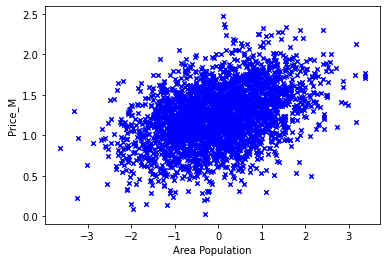

In [9]:
plt.scatter(x_train['Area Population'], y_train, c='blue', marker='x', s=20)

plt.xlabel('Area Population')
plt.ylabel('Price_M')
#plt.legend()

plt.show()

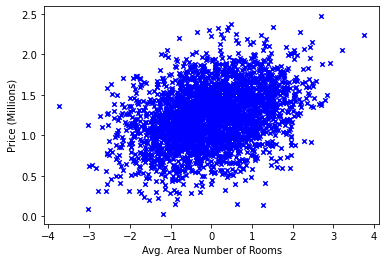

In [10]:
plt.scatter(x_train['Avg. Area Number of Rooms'], y_train, c='blue', marker='x', s=20)

plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price (Millions)')

plt.show()

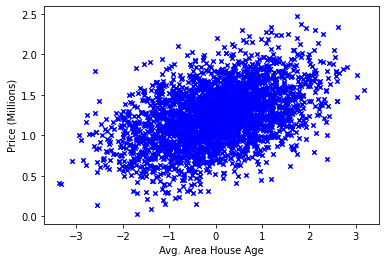

In [11]:
plt.scatter(x_train['Avg. Area House Age'], y_train, c='blue', marker='x', s=20)

plt.xlabel('Avg. Area House Age')
plt.ylabel('Price (Millions)')

plt.show()

In [12]:
# Model function
def prediction(X, w, b):
    p = np.dot(X, w) + b
    return p

In [13]:
# test function
m, n = x_train.shape
w = np.zeros(n)
b = 0
p = prediction(x_train, w, b)
print(p.shape)

(3000,)


In [14]:
# Compute cost function
def cost_function(X, y, w, b):
    m = X.shape[0]
    
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    total_cost = cost / (2 * m)
    
    return total_cost

In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [16]:
# test cost function
m, n = x_train.shape
w_in = np.zeros(n)
b_in = 0.0
cost = cost_function(X=x_train, y=y_train, w=w_in, b=b_in)
print(cost)

0.8252072838157785


In [17]:
# Compute gradient
def gradient(X, y, w, b):
    m, n = X.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0.
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [18]:
# Test gradient function
tmp_dj_dw, tmp_dj_db = gradient(x_train, y_train, w_in, b_in)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.235251274914975
dj_dw at initial w,b: 
 [-0.23113555 -0.15868148 -0.13389593 -0.06349304 -0.1483304 ]


In [19]:
# Compute gradient discent
def gradient_discent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    P_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        b = b - (alpha * dj_db)
        w = w - (alpha * dj_dw)
        
        if i < 100000:
            J_history.append(cost_function(X, y , w, b))
            P_history.append([w, b])
            
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:0.2e}   ")
    return w, b, J_history, P_history

In [20]:
m, n = x_train.shape
w_in = np.zeros(n)
b_in = 0.0
w, b, J_history, P_history = gradient_discent(X=x_train, y=y_train, w_in=w_in, b_in=b_in,
                                              alpha=1.0e-1, num_iters=100, cost_function=cost_function,
                                              gradient_function=gradient)

Iteration    0: Cost 6.69e-01   
Iteration   10: Cost 8.55e-02   
Iteration   20: Cost 1.49e-02   
Iteration   30: Cost 6.32e-03   
Iteration   40: Cost 5.25e-03   
Iteration   50: Cost 5.11e-03   
Iteration   60: Cost 5.10e-03   
Iteration   70: Cost 5.09e-03   
Iteration   80: Cost 5.09e-03   
Iteration   90: Cost 5.09e-03   


In [21]:
# Print w and b parameters
print(f"w : {w}")
print(f"b : {b}")
#print(f"P_history : {P_history}")

w : [ 2.31038101e-01  1.64085409e-01  1.19688077e-01 -1.18627904e-05
  1.50449127e-01]
b : 1.232459029841818


In [22]:
# Test model with x_test
p = prediction(x_test, w=w, b=b)

print(f"Prediction on training set:\n{p[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[1.44841207 1.3021791  1.35549878 1.02785579]
Target values 
[1.05903356 1.50589091 1.05898799 1.26061681]


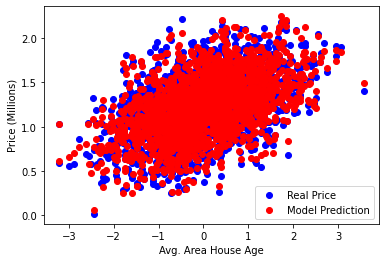

In [23]:
plt.scatter(x_test['Avg. Area House Age'], y_test, c='blue')
plt.scatter(x_test['Avg. Area House Age'], p, c='red')

plt.xlabel('Avg. Area House Age')
plt.ylabel('Price (Millions)')
plt.legend(['Real Price','Model Prediction'])

plt.show()

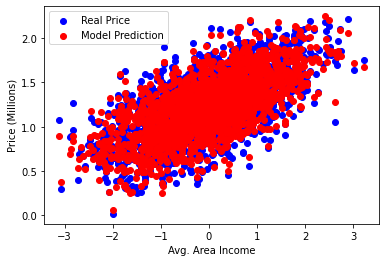

In [24]:
plt.scatter(x_test['Avg. Area Income'], y_test, c='blue')
plt.scatter(x_test['Avg. Area Income'], p, c='red')

plt.xlabel('Avg. Area Income')
plt.ylabel('Price (Millions)')
plt.legend(['Real Price','Model Prediction'])

plt.show()

## Linear Regression Using Scikit-learn Library

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [26]:
# Normalize the training set
scaler = StandardScaler()
x_normal = scaler.fit_transform(x)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x,axis=0)}")   
print(f"Peak to Peak range by €column in Normalized X:{np.ptp(x_normal,axis=0)}")

Peak to Peak range by column in Raw        X:[8.99051172e+04 6.87478388e+00 7.52339431e+00 4.50000000e+00
 6.94491027e+04]
Peak to Peak range by €column in Normalized X:[8.43630917 6.93472047 7.48051121 3.64663656 6.99763218]


In [27]:
x_trainset = x_normal[:3000]

x_testset = x_normal[3000:]
y_trainset = y[:3000]
y_testset = y[3000:]

In [28]:
# Create and fit the regression model
linear_model = LinearRegression()
linear_model.fit(x_trainset, y_trainset)

LinearRegression()

In [29]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [ 0.23105862  0.16410579  0.11991739 -0.00024321  0.15044325], b = 1.23


In [30]:
# Make a prediction
y_predict = linear_model.predict(x_testset)
print(f"Prediction on training set:\n{y_predict[:4]}" )
print(f"Target values \n{y_trainset[:4]}")

Prediction on training set:
[1.44827269 1.3019687  1.35531766 1.02794836]
Target values 
0    1.059034
1    1.505891
2    1.058988
3    1.260617
Name: Price_M, dtype: float64


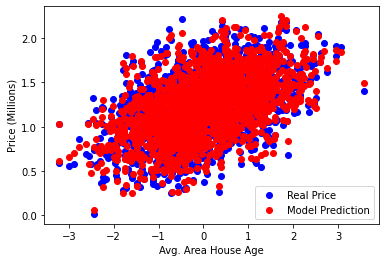

In [31]:
# plot predictions and targets vs original features    
plt.scatter(x_test['Avg. Area House Age'], y_testset, c='blue')
plt.scatter(x_test['Avg. Area House Age'], y_predict, c='red')

plt.xlabel('Avg. Area House Age')
plt.ylabel('Price (Millions)')
plt.legend(['Real Price','Model Prediction'])

plt.show()

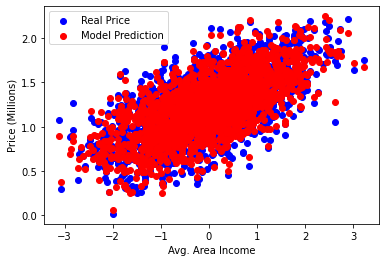

In [32]:
plt.scatter(x_test['Avg. Area Income'], y_testset, c='blue')
plt.scatter(x_test['Avg. Area Income'], y_predict, c='red')

plt.xlabel('Avg. Area Income')
plt.ylabel('Price (Millions)')
plt.legend(['Real Price','Model Prediction'])

plt.show()